In [1]:
import pandas as pd 
import numpy as np

In [2]:
doc = pd.read_csv('Dataset/CassiopéeShift/Avion.csv')
doc.head()

,Frame,Time(s),chestUpper_T_glob,chestUpper_T_glob.1,chestUpper_T_glob.2,rShldrBend_T_glob,rShldrBend_T_glob.1,rShldrBend_T_glob.2,rForearmBend_T_glob,rForearmBend_T_glob.1,...,lShldrBend_T_glob.2,lForearmBend_T_glob,lForearmBend_T_glob.1,lForearmBend_T_glob.2,lHand_T_glob,lHand_T_glob.1,lHand_T_glob.2,pelvis_T_glob,pelvis_T_glob.1,pelvis_T_glob.2
0,NaN,NaN,X,Y,Z,X,Y,Z,X,Y,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
1,2272.0,90.88,0.311,134.811,-5.954,-15.498,143.567,-7.084,-25.906,116.112,...,-6.061,26.950,114.738,-8.949,19.396,112.824,18.561,0.654,108.701,-5.26
2,2273.0,90.92,0.307,134.810,-5.999,-15.500,143.573,-7.126,-25.923,116.120,...,-6.128,26.939,114.727,-9.000,19.428,112.849,18.527,0.644,108.701,-5.292
3,2274.0,90.96,0.301,134.812,-6.039,-15.504,143.581,-7.166,-25.942,116.129,...,-6.185,26.929,114.720,-9.048,19.439,112.857,18.487,0.632,108.700,-5.321
4,2275.0,91.00,0.298,134.819,-6.070,-15.507,143.589,-7.207,-25.946,116.130,...,-6.226,26.921,114.725,-9.068,19.440,112.873,18.465,0.621,108.702,-5.35


In [3]:
def format(df):
    # On créé les nouvelles colonnes en combinant les valeurs des colonnes d'origines correspondant à l'articulation
    df['chessUpper']= df['chestUpper_T_glob'].str.cat(df['chestUpper_T_glob.1'], sep=',').str.cat(df['chestUpper_T_glob.2'], sep = ',')  
    df['rShldrBend']= df['rShldrBend_T_glob'].str.cat(df['rShldrBend_T_glob.1'], sep=',').str.cat(df['rShldrBend_T_glob.2'], sep = ',') 
    df['rForearmBend']= df['rForearmBend_T_glob'].str.cat(df['rForearmBend_T_glob.1'], sep=',').str.cat(df['rForearmBend_T_glob.2'], sep = ',')
    df['lForearmBend']= df['lForearmBend_T_glob'].str.cat(df['lForearmBend_T_glob.1'], sep=',').str.cat(df['lForearmBend_T_glob.2'], sep = ',')
    df['lHand']= df['lHand_T_glob'].str.cat(df['lHand_T_glob.1'], sep=',').str.cat(df['lHand_T_glob.2'], sep = ',')
    df['pelvis']= df['pelvis_T_glob'].str.cat(df['pelvis_T_glob.1'], sep=',').str.cat(df['pelvis_T_glob.2'], sep = ',')
    
    # On les réorganise
    df = df[['Frame', 'Time(s)', 'chessUpper', 'rShldrBend', 'rForearmBend', 'lForearmBend', 'lHand','pelvis']]
    
    # On convertit les colonnes en tableau numpy afin de pouvoir séparer les valeurs des chaines de caractère dans des listes de coordonnées
    chessUpper = df['chessUpper'].values
    rShldrBend = df['rShldrBend'].values
    rForearmBend = df['rForearmBend'].values
    lForearmBend = df['lForearmBend'].values
    lHand = df['lHand'].values
    pelvis = df['pelvis'].values
    # On sépare les valeurs
    for i in range(1,df['chessUpper'].values.shape[0]):
        chessUpper[i] = chessUpper[i].split(',')
        rShldrBend[i] = rShldrBend[i].split(',')
        rForearmBend[i] = rForearmBend[i].split(',')
        lForearmBend[i] = lForearmBend[i].split(',')
        lHand[i] = lHand[i].split(',')
        pelvis[i] = pelvis[i].split(',')
    
    #On met à jour le df et on le renvoie
    df['chessUpper']= chessUpper
    df['rShldrBend']= rShldrBend
    df['rForearmBend']=  rForearmBend
    df['lForearmBend']= lForearmBend
    df['lHand']= lHand
    df['pelvis']= pelvis
    df.drop([0], axis = 0, inplace = True)
    return df



In [4]:
import pandas as pd
import numpy as np
import struct

def to_skeleton(df, name_df):
    joints_df = df.iloc[:, 2:]
    data = joints_df.to_numpy()

    num_joints = data.shape[1]
    num_frames = data.shape[0]
    framerate = 30

    with open('Dataset/Skeletons/'+ '{}'.format(name_df) + '.skeleton', 'wb') as f:

        f.write(struct.pack('i', num_joints))
        f.write(struct.pack('i', num_frames))
        f.write(struct.pack('i', framerate))
    

        for frame in data:
            for joint in range(num_joints):

                x = float(frame[joint][0])
                y = float(frame[joint][1])
                z = float(frame[joint][2])
            

                f.write(struct.pack('fff', x, y, z))

                f.write(struct.pack('ffff', 1, 0, 0, 0))

    f.close()


In [5]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_skeleton(skeleton_file):

    if not os.path.exists(skeleton_file):
        raise ValueError("Le fichier skeleton n'existe pas")

    with open(skeleton_file, 'rb') as f:
  
        num_joints = struct.unpack('i', f.read(4))[0]
        num_frames = struct.unpack('i', f.read(4))[0]
        framerate = struct.unpack('i', f.read(4))[0]
        

        data = np.zeros((num_frames, num_joints, 3))
        for frame in range(num_frames):
            for joint in range(num_joints):

                x, y, z = struct.unpack('fff', f.read(12))

                f.read(16) 

                data[frame, joint, :] = np.array([x, y, z])
    

    time = np.arange(num_frames) / framerate
    

    fig, axs = plt.subplots(num_joints, 1, figsize=(8, num_joints*2), sharex=True)
    

    for joint in range(num_joints):
        axs[joint].plot(time, data[:, joint, 0], label='x')
        axs[joint].plot(time, data[:, joint, 1], label='y')
        axs[joint].plot(time, data[:, joint, 2], label='z')
        axs[joint].set_title('Joint {}'.format(joint))
        axs[joint].set_ylabel('Position (m)')
        axs[joint].legend()

    axs[-1].set_xlabel('Temps (s)')
    fig.suptitle('Coordonnées des articulations')

    plt.show()


In [6]:
import os 
for file_name in os.listdir('Dataset/CassiopéeShift'):
    try:
        to_skeleton(format(pd.read_csv('Dataset/CassiopéeNorm/' + file_name)), file_name[:-4])

    except Exception as e :
        pass
    
    

/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_12542/4076484993.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chessUpper']= chessUpper
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_12542/4076484993.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rShldrBend']= rShldrBend
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_12542/4076484993.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

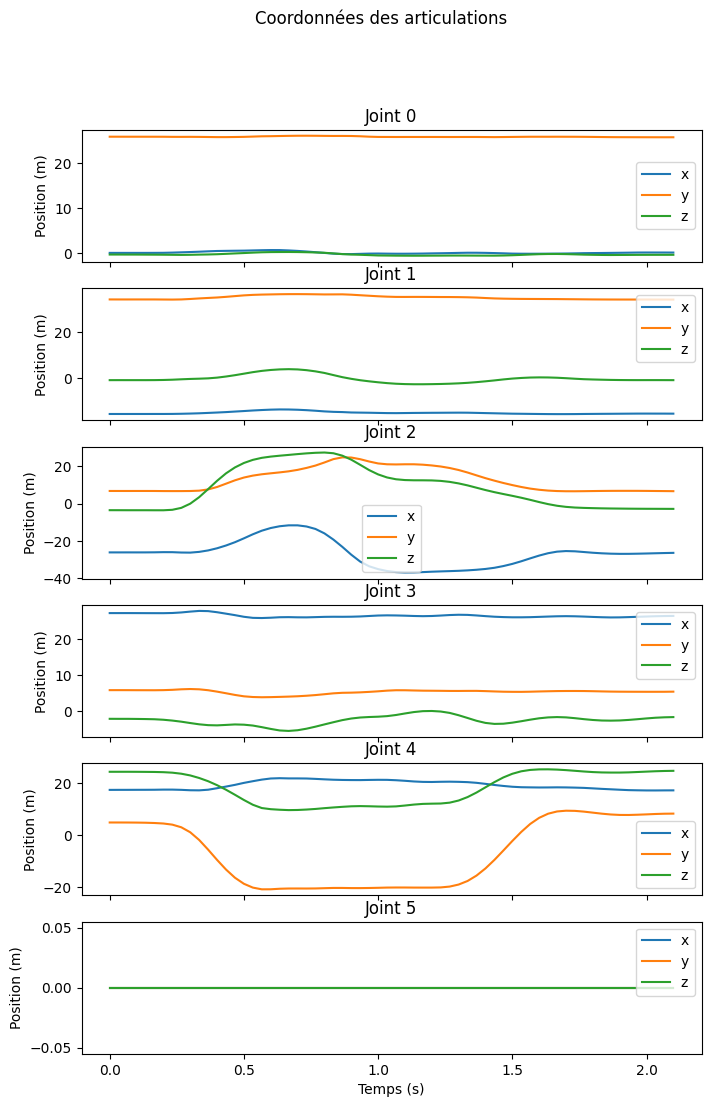

In [7]:
plot_skeleton('Dataset/Skeletons/200.skeleton')